<a href="https://colab.research.google.com/github/Sandeep2111/Appliance-Energy-Prediction/blob/main/Appliance_Energy_prediction_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Appliance Energy Prediction

The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions
were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the
temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for
10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters.
Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded
from a public data set from Reliable Prognosis (rp5.ru) and merged together with the
experimental data sets using the date and time column. Two random variables have been
included in the data set for testing the regression models and to filter out non-predictive attributes
(parameters).

### Independent Variables:

* date time year-month-day hour:minute:second
* lights, energy use of light fixtures in the house in Wh (Drop this column)
* T1, Temperature in kitchen area, in Celsius
* T2, Temperature in living room area, in Celsius
* T3, Temperature in laundry room area
* T4, Temperature in office room, in Celsius
* T5, Temperature in bathroom, in Celsius
* T6, Temperature outside the building (north side), in Celsius
* T7, Temperature in ironing room , in Celsius
* T8, Temperature in teenager room 2, in Celsius
* T9, Temperature in parents room, in Celsius
* T_out, Temperature outside (from Chievres weather station)

* RH1, Humidity in kitchen area, in %
* RH2,Humidity in living room area, in %
* RH3, Humidity in laundry room area, in %
* RH4,Humidity in office room, in %
* RH5, Humidity in bathroom, in %
* RH6, Humidity outside the building (north side), in %
* RH7, Humidity in ironing room, in %
* RH8,Humidity in teenager room 2, in %
* RH9, Humidity in parents room, in %
* RHout, Humidity outside (from Chievres weather station), in %
* Wind speed : Wind Speed (from Chievres weather station), in m/s
* Visibility : Visibility(from Chievres weather station), in km
* Tdewpoint: the atmospheric temperature (varying according to pressure and humidity) below which water droplets begin to condense and dew can form
* rv1, Random variable 1, nondimensional
* rv2, Random variable 2, nondimensional

### Dependent variable:
* Appliances, energy use in Wh


### Humidity
Humidity is the concentration of water vapor present in the air. Water vapor, the gaseous state of water, is generally invisible to the human eye. Humidity indicates the likelihood for precipitation, dew, or fog to be present.


In [ ]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from itertools import combinations
%matplotlib inline

In [ ]:
#Reading the dataset.
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Dataset/Copy of data_application_energy.csv')

In [ ]:
dataset.head()

date  Appliances  lights  ...  Tdewpoint        rv1        rv2
0  2016-01-11 17:00:00          60      30  ...        5.3  13.275433  13.275433
1  2016-01-11 17:10:00          60      30  ...        5.2  18.606195  18.606195
2  2016-01-11 17:20:00          50      30  ...        5.1  28.642668  28.642668
3  2016-01-11 17:30:00          50      40  ...        5.0  45.410389  45.410389
4  2016-01-11 17:40:00          60      40  ...        4.9  10.084097  10.084097

[5 rows x 29 columns]

In [ ]:
dataset.drop(columns=['rv1','rv2','lights','date'],axis=1,inplace=True)

## Exploratory Data Analysis

In [ ]:
# Shape of the dataset

print('The Shape of the Dataset is: ',dataset.shape)

The Shape of the Dataset is:  (19735, 25)


Here We can see that the dataset contains 19735 examples and contains 29 features of which 1 is dependent variable and other 28 are independent variable.

In [ ]:
#check for any null values in the dataset

dataset.isnull().sum()

Appliances     0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
dtype: int64

It's good we can see that the dataset doesn't contain any null values we can proceed further

### Separating dataset based on the type of columns

1. Temperatur features
2. weather features
3. humidity features

In [ ]:
# Columns for temperature sensors
temperature_cols = ["T1", "T2", "T3", "T4", "T5", "T6", "T7", "T8", "T9"]
temperature_data = dataset[temperature_cols]
# Columns for humidity sensors
humidity_cols = ["RH_1", "RH_2", "RH_3", "RH_4", "RH_5", "RH_6", "RH_7", "RH_8", "RH_9"]
humidity_data = dataset[humidity_cols]
# Columns for weather data
weather_cols = ["T_out", "Tdewpoint", "RH_out", "Press_mm_hg", "Windspeed", "Visibility"]
weather_data = dataset[weather_cols]
# Target variable column
target = ["Appliances"]
target_data = dataset[target]

### Finding the descriptive statistics of each type of dataset

In [ ]:
print('Descriptive Statistics of temparature features:\n')
temperature_data.describe()

Descriptive Statistics of temparature features:



T1            T2  ...            T8            T9
count  19735.000000  19735.000000  ...  19735.000000  19735.000000
mean      21.686571     20.341219  ...     22.029107     19.485828
std        1.606066      2.192974  ...      1.956162      2.014712
min       16.790000     16.100000  ...     16.306667     14.890000
25%       20.760000     18.790000  ...     20.790000     18.000000
50%       21.600000     20.000000  ...     22.100000     19.390000
75%       22.600000     21.500000  ...     23.390000     20.600000
max       26.260000     29.856667  ...     27.230000     24.500000

[8 rows x 9 columns]

In [ ]:
print('Descriptive Statistics of humidity features:\n')
humidity_data.describe()

Descriptive Statistics of humidity features:



RH_1          RH_2  ...          RH_8          RH_9
count  19735.000000  19735.000000  ...  19735.000000  19735.000000
mean      40.259739     40.420420  ...     42.936165     41.552401
std        3.979299      4.069813  ...      5.224361      4.151497
min       27.023333     20.463333  ...     29.600000     29.166667
25%       37.333333     37.900000  ...     39.066667     38.500000
50%       39.656667     40.500000  ...     42.375000     40.900000
75%       43.066667     43.260000  ...     46.536000     44.338095
max       63.360000     56.026667  ...     58.780000     53.326667

[8 rows x 9 columns]

In [ ]:
print('Descriptive Statistics of weather features:\n')
weather_data.describe()

Descriptive Statistics of weather features:



T_out     Tdewpoint  ...     Windspeed    Visibility
count  19735.000000  19735.000000  ...  19735.000000  19735.000000
mean       7.411665      3.760707  ...      4.039752     38.330834
std        5.317409      4.194648  ...      2.451221     11.794719
min       -5.000000     -6.600000  ...      0.000000      1.000000
25%        3.666667      0.900000  ...      2.000000     29.000000
50%        6.916667      3.433333  ...      3.666667     40.000000
75%       10.408333      6.566667  ...      5.500000     40.000000
max       26.100000     15.500000  ...     14.000000     66.000000

[8 rows x 6 columns]

## Observations

* Temperature ranges for all home sensors is between 14.89℃ to 29.86℃ except for T6 for which it is -6.06℃ to 28.29℃. The reason for such low readings is that the sensor is kept outside.
* Similarly, humidity ranges for all home sensors is between 20.60% to 63.36%. Except for RH_5 which is `Bathroom humidity` and RH_6 which is `outside humidity`, whose ranges are 29.82% to 96.32% and 1% to 99.9% respectively.

In [ ]:
print('Descriptive Statistics of energy consumption of appliance:\n')
target_data.describe()

Descriptive Statistics of energy consumption of appliance:



Appliances
count  19735.000000
mean      97.694958
std      102.524891
min       10.000000
25%       50.000000
50%       60.000000
75%      100.000000
max     1080.000000

Minimum energy consumption is 10Wh and maximum is 1080Wh
* 75% of the appliance consumption is between 10wh and 100wh
* only 25% of energy consumption by appliance is between 100 and 1080.

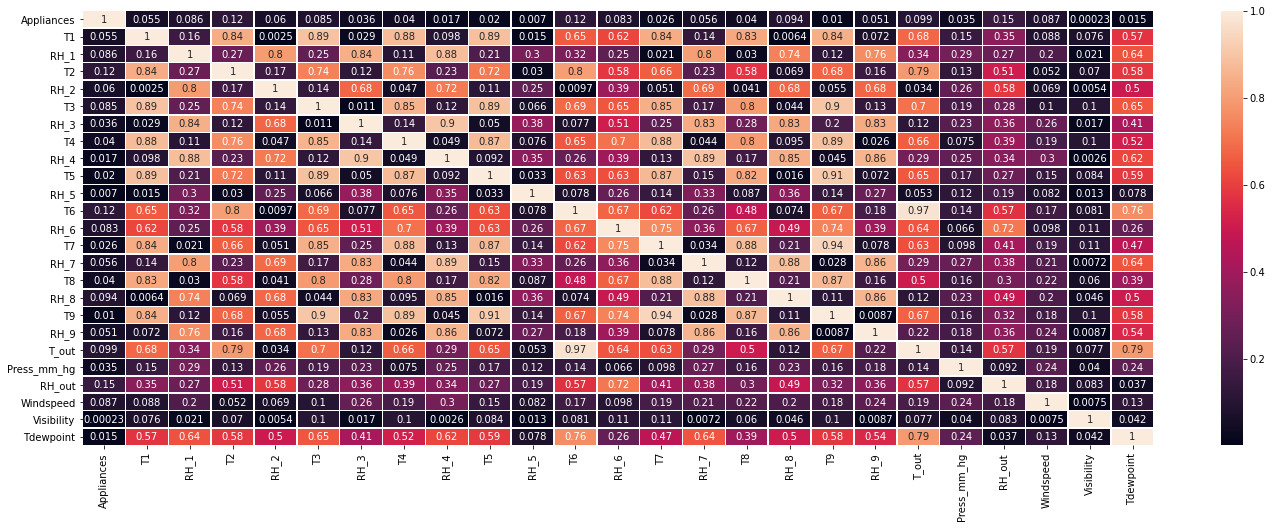

In [ ]:
plt.figure(figsize=(24,8))
sns_heatmap = sns.heatmap(dataset.corr().abs(),annot=True,linewidths=0.5)
heatmap_fig = sns_heatmap.get_figure()
heatmap_fig.savefig('heatmap.png')
plt.show()

In [ ]:
dataset.corr()

Appliances        T1      RH_1  ...  Windspeed  Visibility  Tdewpoint
Appliances     1.000000  0.055447  0.086031  ...   0.087122    0.000230   0.015353
T1             0.055447  1.000000  0.164006  ...  -0.087654   -0.076210   0.571309
RH_1           0.086031  0.164006  1.000000  ...   0.204932   -0.021057   0.639106
T2             0.120073  0.836834  0.269839  ...   0.052495   -0.069721   0.582602
RH_2          -0.060465 -0.002509  0.797535  ...   0.069190   -0.005368   0.499152
T3             0.085060  0.892402  0.253230  ...  -0.100776   -0.102310   0.645886
RH_3           0.036292 -0.028550  0.844677  ...   0.263188    0.017041   0.414387
T4             0.040281  0.877001  0.106180  ...  -0.185747   -0.104768   0.519471
RH_4           0.016965  0.097861  0.880359  ...   0.300192    0.002636   0.616509
T5             0.019760  0.885247  0.205797  ...  -0.145011   -0.084164   0.588362
RH_5           0.006955 -0.014782  0.303258  ...   0.082044   -0.013133   0.078175
T6             0.117638  0.654769  0.316141  ...   0.169185   -0.081313   0.764242
RH_6          -0.083178 -0.615045  0.245126  ...   0.098317    0.108705  -0.260417
T7             0.025801  0.838705  0.021397  ...  -0.185892   -0.110089   0.466625
RH_7          -0.055642  0.135182  0.801122  ...   0.212979   -0.007184   0.641857
T8             0.039572  0.825413 -0.030053  ...  -0.218876   -0.060098   0.391810
RH_8          -0.094039 -0.006441  0.736196  ...   0.202380    0.046178   0.501775
T9             0.010010  0.844777  0.115263  ...  -0.177756   -0.103915   0.581483
RH_9          -0.051462  0.071756  0.764001  ...   0.238655    0.008667   0.540328
T_out          0.099155  0.682846  0.340767  ...   0.192936   -0.077367   0.790661
Press_mm_hg   -0.034885 -0.150574 -0.293957  ...  -0.235032    0.040315  -0.244098
RH_out        -0.152282 -0.345481  0.274126  ...  -0.176458    0.083125   0.036506
Windspeed      0.087122 -0.087654  0.204932  ...   1.000000   -0.007516   0.125972
Visibility     0.000230 -0.076210 -0.021057  ...  -0.007516    1.000000  -0.042190
Tdewpoint      0.015353  0.571309  0.639106  ...   0.125972   -0.042190   1.000000

[25 rows x 25 columns]

## Finding the correlation between the columns

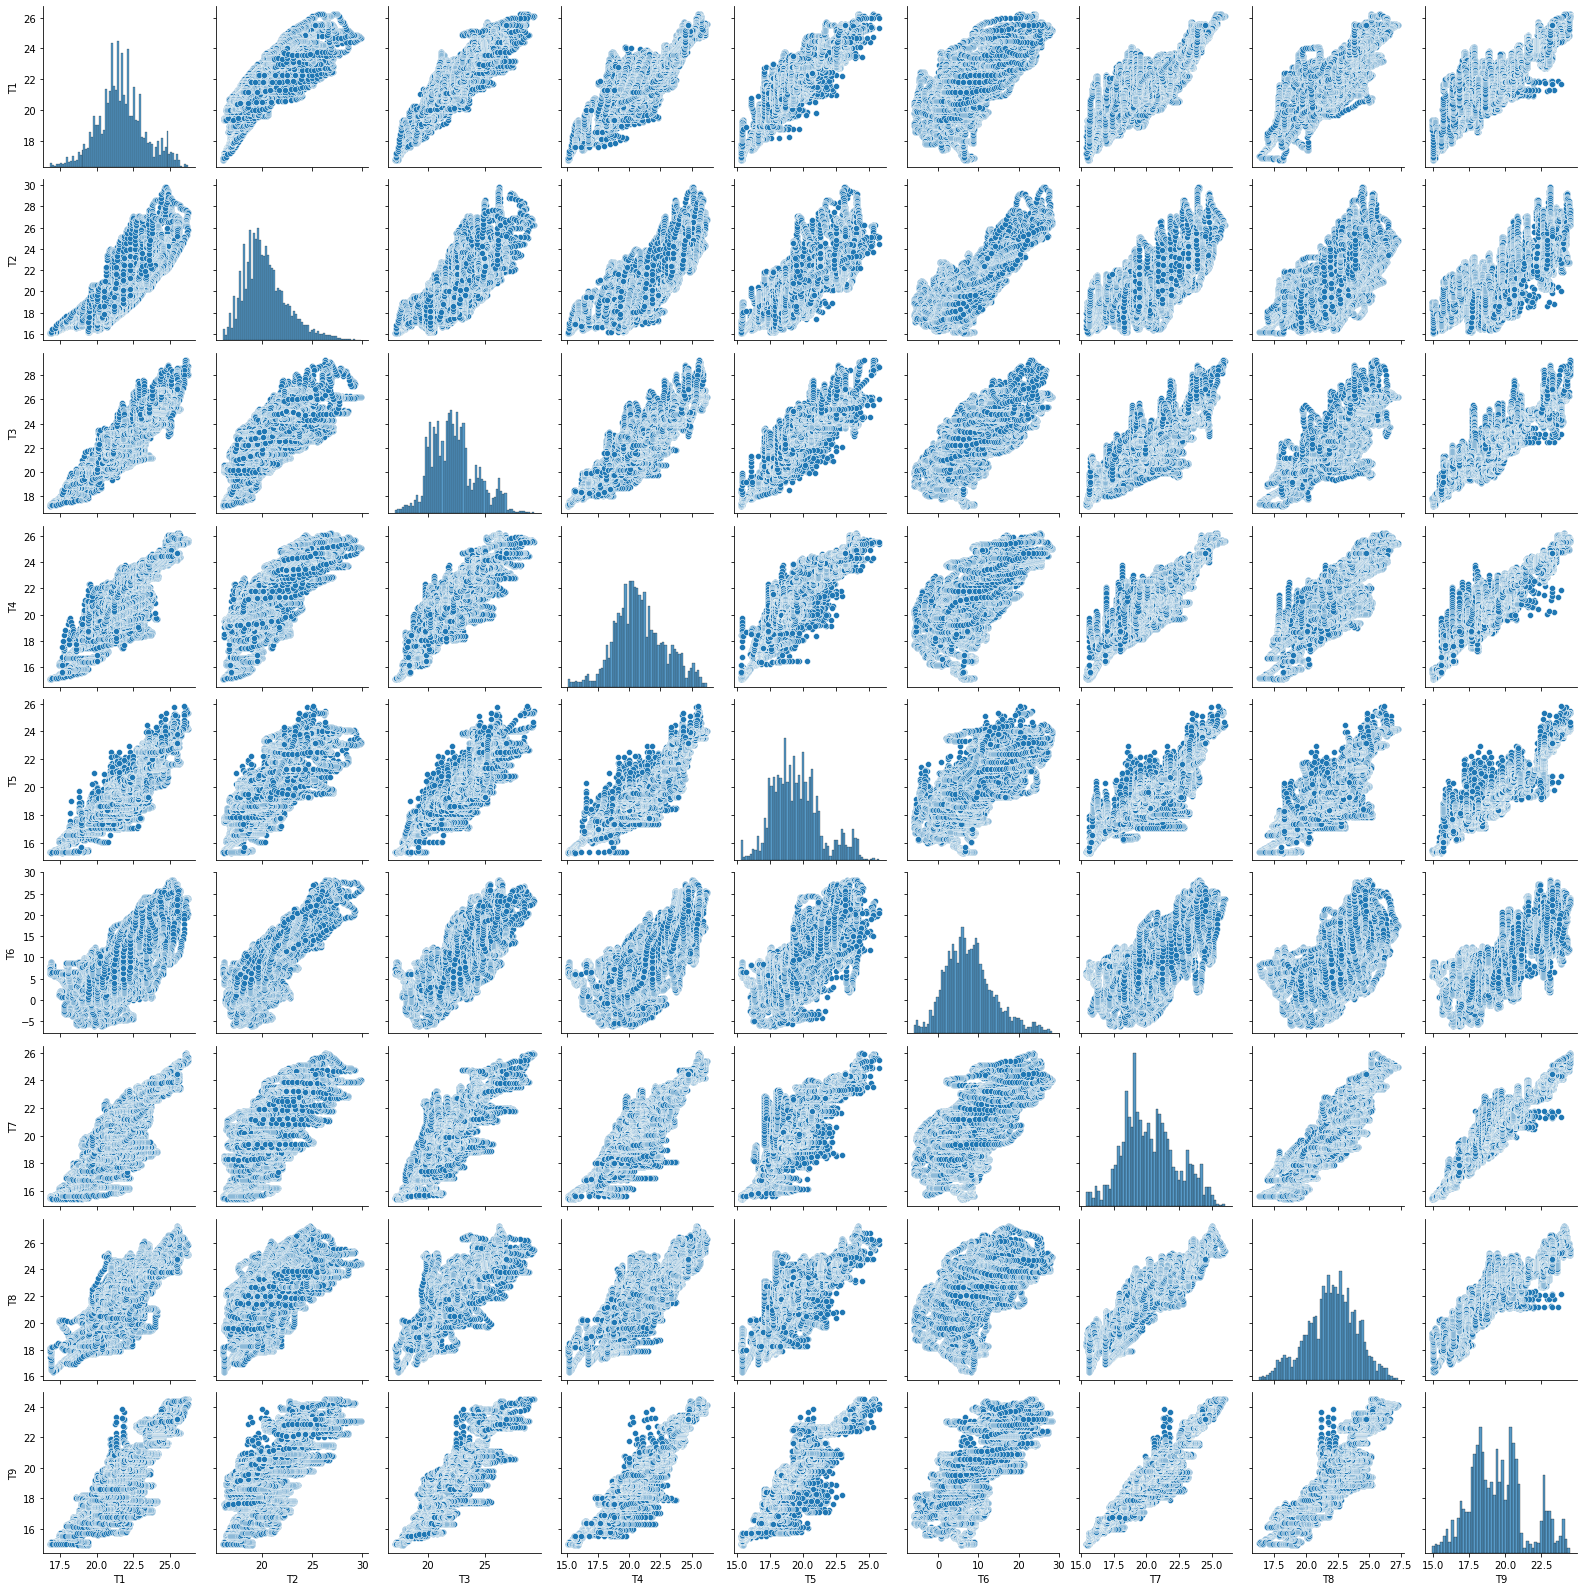

In [ ]:
#Find the correlation between the temperature columns using pairplot
temp_pair = sns.pairplot(temperature_data)
temp_fig = temp_pair.savefig('temp_pairplot.png')
#temp_fig.savefig('temp_pairplot.png')

Here we can see that T7 and T9 are highly skewed let us plot the graph for T7 and T9

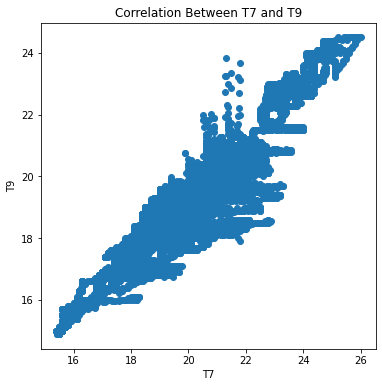

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(dataset["T7"], dataset["T9"])
plt.title('Correlation Between T7 and T9')
plt.xlabel('T7')
plt.ylabel('T9')
plt.show()

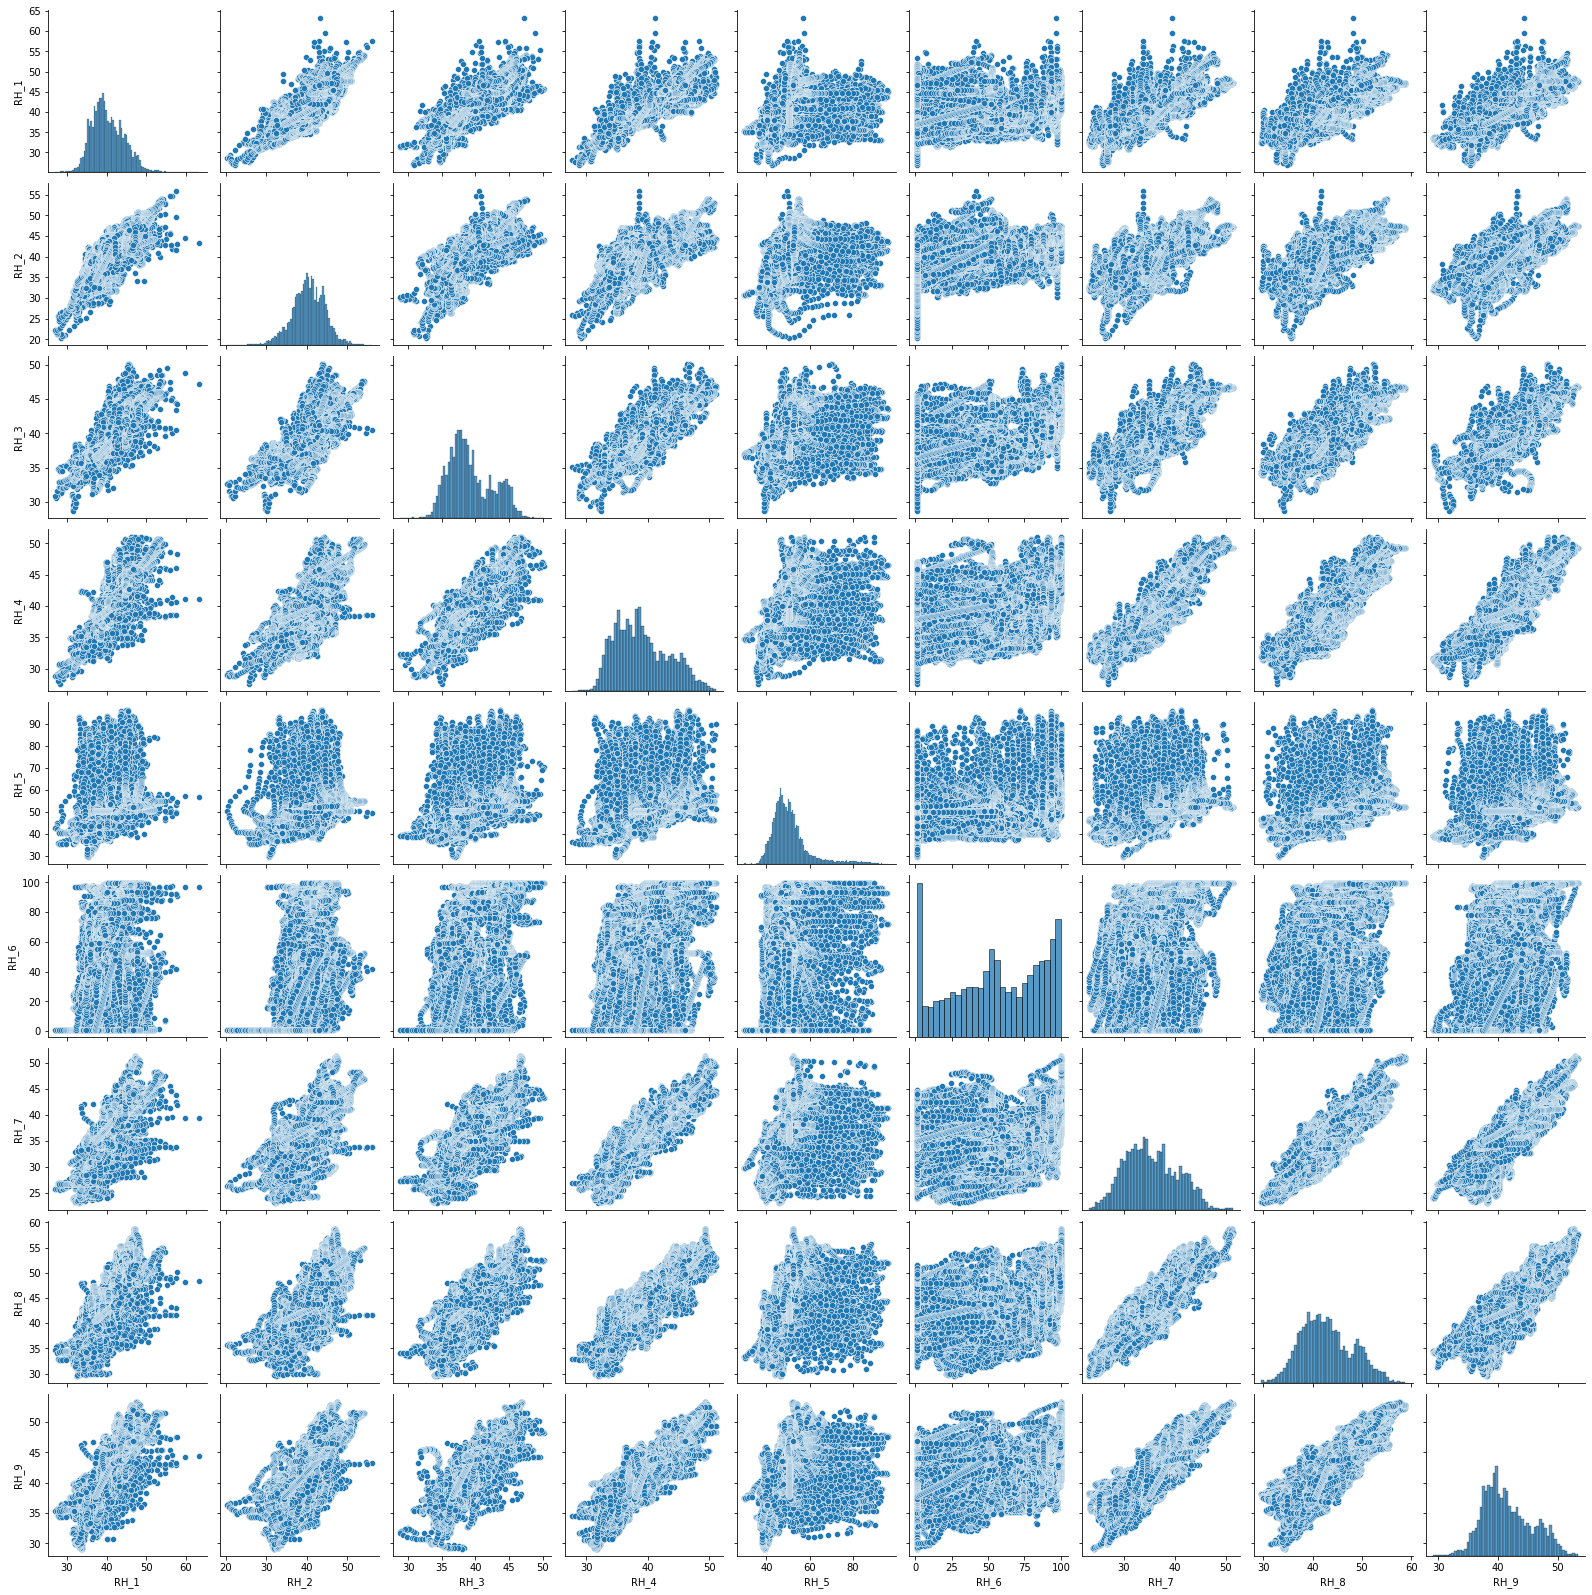

In [ ]:
#Correlation between the Humidity Columns
humidity_pairplot = sns.pairplot(humidity_data)
humidity_pairplot.savefig('humidity_pair')

There's no highly Correlated features between the Humidity columns

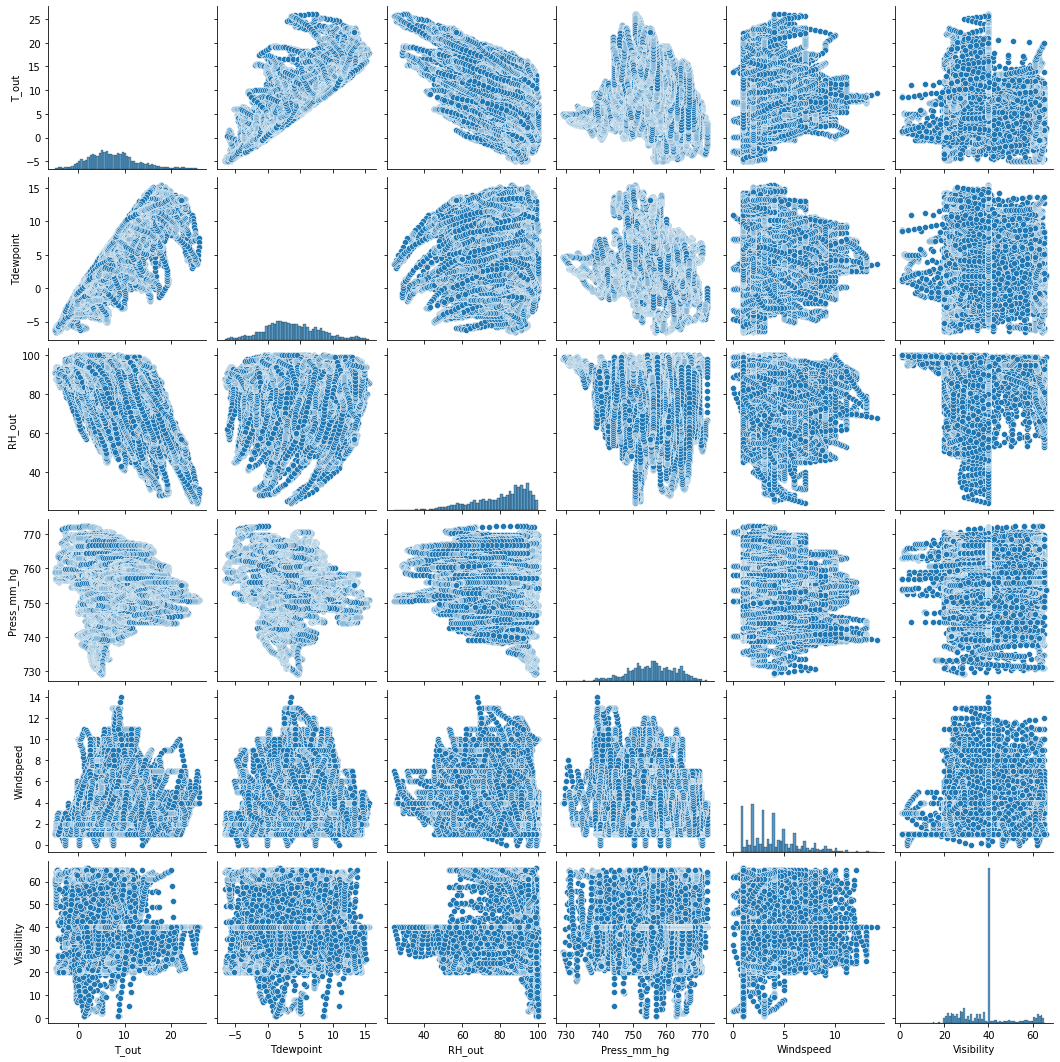

In [ ]:
#Correlation between the Weather data
sns.pairplot(weather_data)

We can see here that the features of weather data are uncorrelated to one another.

### Check the Distribution of the Dataset using Histogram

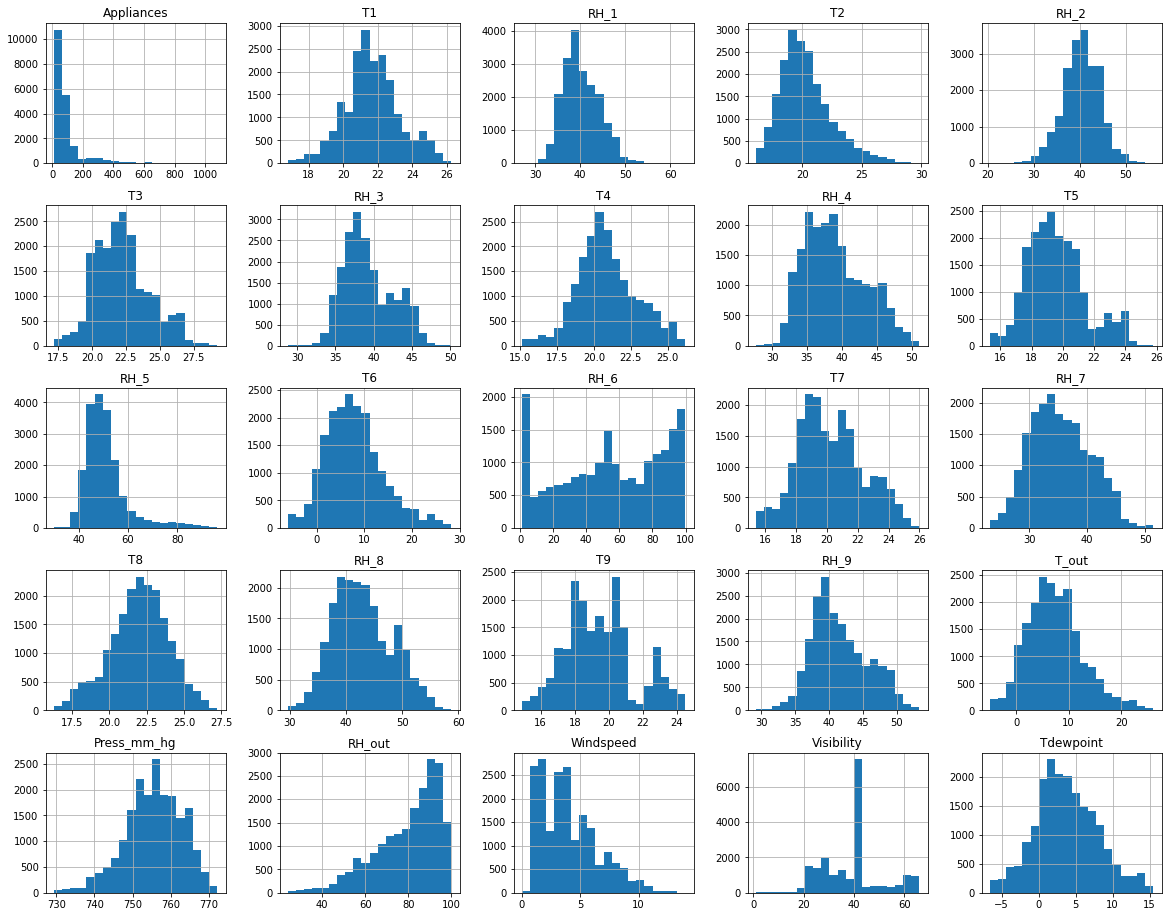

In [ ]:
dataset.hist(figsize=(20,16),bins=20)
plt.show()

* Here we can see that Except RH_6 and RH_out all humidity values follow normal Distribution curve.
* In Temperature values T2 seems slighlty Right skewed data 
* Also There is no similarity between the target variable `Appliances` and all the Other Features.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff54bd90e90>]],
      dtype=object)

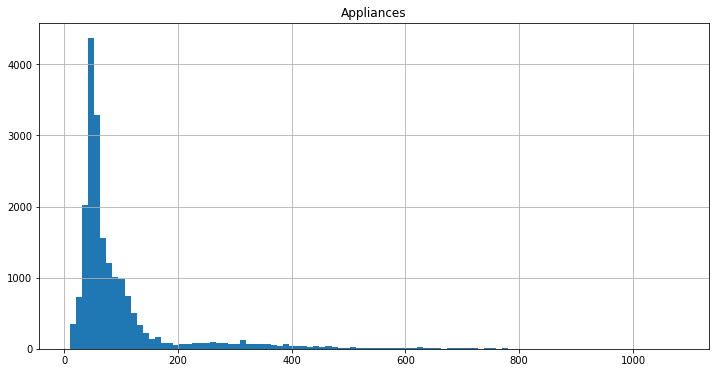

In [ ]:
#Plot the histogram just for the target variable
target_data.hist(figsize=(12,6),bins=100)

We can see that most of the values are in the range of 0-200Wh

### Check the correlation between the columns

In [ ]:
#check correlation between T7 and T9 as we found out that these columns are highly correlated using pearsonr package
corr_coef,p_value = pearsonr(dataset['T7'],dataset['T9'])
print('Correlation coefficint of T7 and T9 is:',corr_coef)
print('p_value of T7 and T9 is:',p_value)

Correlation coefficint of T7 and T9 is: 0.9447764235687446
p_value of T7 and T9 is: 0.0


Here we can see that the correlation value is high but the p_value is less than 0.005 hence we can reject the null hypothesis which is the columns doesn't affect each other

In [ ]:
#Check for all the other columns pair wise
for pair in combinations(dataset.columns,2):
  col_1, col_2 = pair
  # Calculate the coefficient and p-value
  corr_coef, p_val = pearsonr(dataset[col_1], dataset[col_2])
  # Check for high correlation
  if corr_coef > 0.9 or corr_coef < -0.9:
      # Print details for pairs with high correlation
      print("Column pair : {}, {}".format(*pair))
      print("Correlation coefficient : {}".format(corr_coef))
      print("p-value : {}".format(p_val))

Column pair : T3, T9
Correlation coefficient : 0.901323585082566
p-value : 0.0
Column pair : T5, T9
Correlation coefficient : 0.9110551178067936
p-value : 0.0
Column pair : T6, T_out
Correlation coefficient : 0.9747866900664539
p-value : 0.0
Column pair : T7, T9
Correlation coefficient : 0.9447764235687446
p-value : 0.0


* We can see that there is a high correlation between few columns but the p_value is less than 0.005 hence we need to reject the null hypothesis which is `the columns doesn't affect each other`.

* T6 and T_out seems to be highly correlated it is because T6 is the outside temperature of building and the T_out is the temperature outside the weather station

Text(0.5, 1.0, 'Correlation between T6 and T_out')

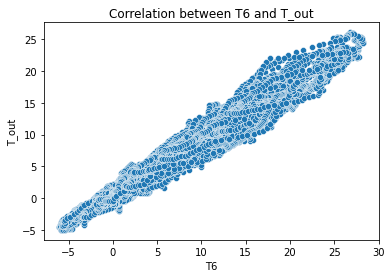

In [ ]:
#Let us plot the for T6 and T_out
sns.scatterplot(x=dataset['T6'],y=dataset['T_out'])
plt.title('Correlation between T6 and T_out')

# Building the Model

In [ ]:
#import the Required Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [ ]:
Models = ['LinearRegression','Ridge','Lasso','RandomForestRegressor','SVR','DecisionTreeRegressor']

In [ ]:
#split the dataset into dependent and independent variables and also split it into into train and test set
X = dataset.drop('Appliances',axis=1)
y = dataset['Appliances']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
Linear_model = LinearRegression()
Linear_model.fit(X_train,y_train)
linear_model_train_score = Linear_model.score(X_train,y_train)
linear_model_test_score = Linear_model.score(X_test,y_test)

In [ ]:
print('Linear Regression Train Score: ',linear_model_train_score)
print('Linear Regression Test Score: ',linear_model_test_score)

Linear Regression Train Score:  0.14889402883346536
Linear Regression Test Score:  0.13572474280967506


The best possible score is 1. Which means that the model is not performing well

In [ ]:
#scaling the data

scaled_data = pd.DataFrame(columns = dataset.columns,index=dataset.index)

In [ ]:
Standard_scaler = StandardScaler()
scaled_data[scaled_data.columns] = Standard_scaler.fit_transform(dataset)

In [ ]:
X = scaled_data.drop('Appliances',axis=1)
y = scaled_data['Appliances']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# Linear Regression

In [ ]:
Linear_model = LinearRegression()
Linear_model.fit(X_train,y_train)
linear_model_train_score = Linear_model.score(X_train,y_train)
linear_model_test_score = Linear_model.score(X_test,y_test)

In [ ]:
print('Linear Regression Train Score: ',linear_model_train_score)
print('Linear Regression Test Score: ',linear_model_test_score)

Linear Regression Train Score:  0.14889402883346525
Linear Regression Test Score:  0.13572474280967528


In [ ]:
train_predict = Linear_model.predict(X_train)
test_predict = Linear_model.predict(X_test)
Linear_rmse_score_train = mean_squared_error(y_train,train_predict)
Linear_rmse_score_test = mean_squared_error(y_test,test_predict)
print('Train MSE score: ',Linear_rmse_score_train)
print('Test MSE score: ',Linear_rmse_score_test)

Train RMSE score:  0.8331975880239106
Test RMSE score:  0.9367394621171424


Best Value is 0.0 Which means that our model is not performing well

# Ridge Regression

In [ ]:
Ridge_model = Ridge()
Ridge_model.fit(X_train,y_train)
train_predict = Ridge_model.predict(X_train)
test_predict = Ridge_model.predict(X_test)
Ridge_rmse_score_train = mean_squared_error(y_train,train_predict)
Ridge_rmse_score_test = mean_squared_error(y_test,test_predict)
print('Train MSE score: ',Ridge_rmse_score_train)
print('Test MSE score: ',Ridge_rmse_score_test)

Train RMSE score:  0.8331983102910422
Test RMSE score:  0.9367330093639701


In [ ]:
params = {'alpha':[0.0001,0.001,0.01,0.1,1,10,20,50,100]}
Grid_model = GridSearchCV(estimator=Ridge(),param_grid=params,cv=5)

In [ ]:
Grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 50,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
Grid_model.best_params_

{'alpha': 10}

In [ ]:
Ridge_model = Ridge(alpha=10)
Ridge_model.fit(X_train,y_train)
train_predict = Ridge_model.predict(X_train)
test_predict = Ridge_model.predict(X_test)
Ridge_rmse_score_train = mean_squared_error(y_train,train_predict)
Ridge_rmse_score_test = mean_squared_error(y_test,test_predict)
print('Train MSE score: ',Ridge_rmse_score_train)
print('Test MSE score: ',Ridge_rmse_score_test)

Train RMSE score:  0.8332566219150785
Test RMSE score:  0.9367390731871079


# Lasso regression

In [ ]:
Lasso_model = Lasso()
Lasso_model.fit(X_train,y_train)
train_predict = Lasso_model.predict(X_train)
test_predict = Lasso_model.predict(X_test)
Lasso_rmse_score_train = mean_squared_error(y_train,train_predict)
Lasso_rmse_score_test = mean_squared_error(y_test,test_predict)
print('Train MSE score: ',Lasso_rmse_score_train)
print('Test MSE score: ',Lasso_rmse_score_test)

Train RMSE score:  0.9789586916913781
Test RMSE score:  1.0842455675004206


In [ ]:
params = {'alpha':[0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10,20,50,100]}
Grid_model = GridSearchCV(estimator=Lasso(max_iter=5000),param_grid=params,cv=5)

In [ ]:
Grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=5000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1,
                                   10, 20, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
Grid_model.best_params_

{'alpha': 0.0001}

In [ ]:
Lasso_model = Lasso(alpha=0.0001)
Lasso_model.fit(X_train,y_train)
train_predict = Lasso_model.predict(X_train)
test_predict = Lasso_model.predict(X_test)
Lasso_rmse_score_train = mean_squared_error(y_train,train_predict)
Lasso_rmse_score_test = mean_squared_error(y_test,test_predict)
print('Train MSE score: ',Lasso_rmse_score_train)
print('Test MSE score: ',Lasso_rmse_score_test)

Train RMSE score:  0.8332115975373748
Test RMSE score:  0.9367156200154519


# Decision Tree Regressor

In [ ]:
Decision_tree_model = DecisionTreeRegressor()
Decision_tree_model.fit(X_train,y_train)
train_predict = Decision_tree_model.predict(X_train)
test_predict = Decision_tree_model.predict(X_test)
Decision_tree_rmse_score_train = mean_squared_error(y_train,train_predict)
Decision_tree__rmse_score_test = mean_squared_error(y_test,test_predict)
print('Train MSE score: ',Decision_tree_rmse_score_train)
print('Test MSE score: ',Decision_tree__rmse_score_test)

Train RMSE score:  4.666267630134603e-34
Test RMSE score:  0.8675871115275071


In [ ]:
params = {'min_samples_split':[2,4,6,10,20,50],'min_samples_leaf':[1,2,3,4,5]}
Grid_model = GridSearchCV(estimator=DecisionTreeRegressor(),param_grid=params,cv=5,n_jobs=-1)

In [ ]:
Grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 4, 6, 10, 20, 50]},
             pre_dispatch

In [ ]:
Grid_model.best_params_

{'min_samples_leaf': 5, 'min_samples_split': 6}

In [ ]:
Decision_tree_model = DecisionTreeRegressor(min_samples_leaf=5,min_samples_split=2)
Decision_tree_model.fit(X_train,y_train)
train_predict = Decision_tree_model.predict(X_train)
test_predict = Decision_tree_model.predict(X_test)
Decision_tree_rmse_score_train = mean_squared_error(y_train,train_predict)
Decision_tree__rmse_score_test = mean_squared_error(y_test,test_predict)
print('Train MSE score: ',Decision_tree_rmse_score_train)
print('Test MSE score: ',Decision_tree__rmse_score_test)

Train RMSE score:  0.22851360190287878
Test RMSE score:  0.7966786729973468


The Model is overfitting

# Support Vector Machine

In [ ]:
SVR_model = SVR()
SVR_model.fit(X_train,y_train)
train_predict = SVR_model.predict(X_train)
test_predict = SVR_model.predict(X_test)
svr_rmse_score_train = mean_squared_error(y_train,train_predict)
svr_rmse_score_test = mean_squared_error(y_test,test_predict)
print('Train MSE score: ',svr_rmse_score_train)
print('Test MSE score: ',svr_rmse_score_test)

Train RMSE score:  0.7388303598286889
Test RMSE score:  0.8672492294407419


In [ ]:
SVR_model = SVR(C=200)
SVR_model.fit(X_train,y_train)
train_predict = SVR_model.predict(X_train)
test_predict = SVR_model.predict(X_test)
svr_rmse_score_train = mean_squared_error(y_train,train_predict)
svr_rmse_score_test = mean_squared_error(y_test,test_predict)
print('Train MSE score: ',svr_rmse_score_train)
print('Test MSE score: ',svr_rmse_score_test)

Train RMSE score:  0.3679331157032864
Test RMSE score:  0.573519380694825


In [ ]:
test_predict[:10]

array([ 1.51721334, -0.43446307,  1.95512742, -0.54208325, -0.63895303,
       -0.51270026, -0.60010549, -0.25652649, -0.42319908, -0.40043354])

In [ ]:
y_test[:10]

15563    1.875739
12564   -0.465215
10649    1.583120
16554   -0.465215
8130    -0.660295
16981   -0.465215
8164    -0.757835
14583   -0.270136
18716   -0.660295
18643   -0.465215
Name: Appliances, dtype: float64

# Random Forest Regressor

In [ ]:
Random_model = RandomForestRegressor()
Random_model.fit(X_train,y_train)
train_predict = Random_model.predict(X_train)
test_predict = Random_model.predict(X_test)
Random_rmse_score_train = mean_squared_error(y_train,train_predict)
Random_rmse_score_test = mean_squared_error(y_test,test_predict)
print('Train MSE score: ',Random_rmse_score_train)
print('Test MSE score: ',Random_rmse_score_test)

Train RMSE score:  0.0580325522317079
Test RMSE score:  0.4944634775780368


In [ ]:
params = {'min_samples_split':[2,4,6,10,20,50],'min_samples_leaf':[1,2,3,4,5]}
Grid_model = GridSearchCV(estimator=RandomForestRegressor(),param_grid=params,cv=5,n_jobs=-1)

In [ ]:
Grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
Grid_model.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 2}

In [ ]:
Random_model = RandomForestRegressor(min_samples_leaf=1,min_samples_split=2)
Random_model.fit(X_train,y_train)
train_predict = Random_model.predict(X_train)
test_predict = Random_model.predict(X_test)
Random_rmse_score_train = mean_squared_error(y_train,train_predict)
Random_rmse_score_test = mean_squared_error(y_test,test_predict)
print('Train MSE score: ',Random_rmse_score_train)
print('Test MSE score: ',Random_rmse_score_test)

Train RMSE score:  0.058061806772847294
Test RMSE score:  0.49160874069977145


In [ ]:
model_scores = pd.DataFrame(index=Models,columns=['Train_score','Test_score'])

In [ ]:
model_scores

Train_score Test_score
LinearRegression              NaN        NaN
Ridge                         NaN        NaN
Lasso                         NaN        NaN
RandomForestRegressor         NaN        NaN
SVR                           NaN        NaN
DecisionTreeRegressor         NaN        NaN

In [ ]:
train_scores = [Linear_rmse_score_train,Ridge_rmse_score_train,Lasso_rmse_score_train,Random_rmse_score_train,svr_rmse_score_train,Decision_tree_rmse_score_train]

In [ ]:
test_scores = [Linear_rmse_score_test,Ridge_rmse_score_test,Lasso_rmse_score_test,Random_rmse_score_test,svr_rmse_score_test,Decision_tree__rmse_score_test]

In [ ]:
model_scores['Train_score'] = train_scores
model_scores['Test_score'] = test_scores

In [ ]:
model_scores.sort_values(by='Test_score')

Train_score  Test_score
RandomForestRegressor     0.058062    0.491609
SVR                       0.367933    0.573519
DecisionTreeRegressor     0.228514    0.796679
Lasso                     0.833212    0.936716
Ridge                     0.833257    0.936739
LinearRegression          0.833198    0.936739

* We can see that RandomForestRegressor is performing well on the Test set but it is overfitting.
* Wehereas Support vector regressor is performing well both on training and testing set but it is slightly overfitting the model but compared to other model these two models are working fine

## Predicted values of SVR

In [ ]:
print(SVR_model.predict(X_test[:10]))
print('\n')
print(y_test[:10])

[ 1.51721334 -0.43446307  1.95512742 -0.54208325 -0.63895303 -0.51270026
 -0.60010549 -0.25652649 -0.42319908 -0.40043354]


15563    1.875739
12564   -0.465215
10649    1.583120
16554   -0.465215
8130    -0.660295
16981   -0.465215
8164    -0.757835
14583   -0.270136
18716   -0.660295
18643   -0.465215
Name: Appliances, dtype: float64


The predicted values are closer to the actual label which means that the model is performing well on the unseen Test data

##  Linear Regression

In [ ]:
print(Linear_model.predict(X_test[:10]))
print('\n')
print(y_test[:10])

[ 1.05914576 -0.10511699  0.45254555 -0.12213543 -0.42374968  0.64648278
 -0.04005006 -0.31081389  0.04295414 -0.14801521]


15563    1.875739
12564   -0.465215
10649    1.583120
16554   -0.465215
8130    -0.660295
16981   -0.465215
8164    -0.757835
14583   -0.270136
18716   -0.660295
18643   -0.465215
Name: Appliances, dtype: float64


Whereas the least performing model linear regression predicted values are not closer to the actual label value. The model is not performing well on the unseen Test Data.